**Analyze Airbnb's Seattle Dataset**

In [272]:
import pandas as pd
import matplotlib.pyplot as plt

In [273]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

lets look at the dataframe to see what all information can be infered from the datasets

In [274]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [275]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [276]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


the listings dataframe looks interesting, with lots of columns, lets check what all columns are available

In [277]:
pd.set_option('display.max_rows', None)
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

**After checking the datasets provide I will like to answer below three questions**

1. What are the busiest time of the year
2. price impact due to holidays, weekend and peak season
3. Analyze Seattle neighbourhoods by price and occupancy rate


**What are the busiest time of the year**

In [278]:
type(calendar.iloc[2]['date'])

str

If we check the calendar dataframe date column, it is of type str, lets convert it into datetime obj. It will be easy to get weeks months from this object

In [279]:
calendar['date_obj'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar['month'] = calendar['date_obj'].dt.month
calendar['week'] = calendar['date_obj'].dt.week
calendar.head()

/Users/nitinagarwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,listing_id,date,available,price,date_obj,month,week
0,241032,2016-01-04,t,$85.00,2016-01-04,1,1
1,241032,2016-01-05,t,$85.00,2016-01-05,1,1
2,241032,2016-01-06,f,NaN,2016-01-06,1,1
3,241032,2016-01-07,f,NaN,2016-01-07,1,1
4,241032,2016-01-08,f,NaN,2016-01-08,1,1


Looking at the dataset, we have available column with values t/f. We also dont have price value when available value is 'f'. It can be assumed that when available value is 'f', the airbnb is occupied by guests.

lets figure out percentage occupancy and map the number of weekly basis, to find the busiest time of the year

In [280]:
booked_airbnb = calendar[calendar['available']=='f']
available_airbnb = calendar[calendar['available']=='t']

lets group the data by week, to get counts of booked and available airbnbs

In [281]:
booked_airbnb_count_by_week = booked_airbnb.groupby(['week'])['week'].count().to_frame()
booked_airbnb_count_by_week.head()

,week
week,
1,14917
2,12354
3,10913
4,10523
5,9799


In [282]:
available_airbnb_count_by_week = available_airbnb.groupby(['week'])['week'].count().to_frame()
available_airbnb_count_by_week.head()

,week
week,
1,15627
2,14372
3,15813
4,16203
5,16927


In [283]:
merged_counts_by_week = booked_airbnb_count_by_week.merge(available_airbnb_count_by_week, on=booked_airbnb_count_by_week.index.values)

In [284]:
merged_counts_by_week.head()

,key_0,week_x,week_y
0,1,14917,15627
1,2,12354,14372
2,3,10913,15813
3,4,10523,16203
4,5,9799,16927


In [285]:
merged_counts_by_week['total_listings'] = merged_counts_by_week['week_x'] + merged_counts_by_week['week_y']
merged_counts_by_week['percetage_occupancy'] = (merged_counts_by_week['week_x']/merged_counts_by_week['total_listings']) * 100

merged_counts_by_week.head(10)

,key_0,week_x,week_y,total_listings,percetage_occupancy
0,1,14917,15627,30544,48.837742
1,2,12354,14372,26726,46.224650
2,3,10913,15813,26726,40.832897
3,4,10523,16203,26726,39.373644
4,5,9799,16927,26726,36.664671
5,6,9312,17414,26726,34.842475
6,7,8726,18000,26726,32.649854
7,8,8406,18320,26726,31.452518
8,9,7991,18735,26726,29.899723
9,10,7902,18824,26726,29.566714


lets plot this info so that it can be easily analysed

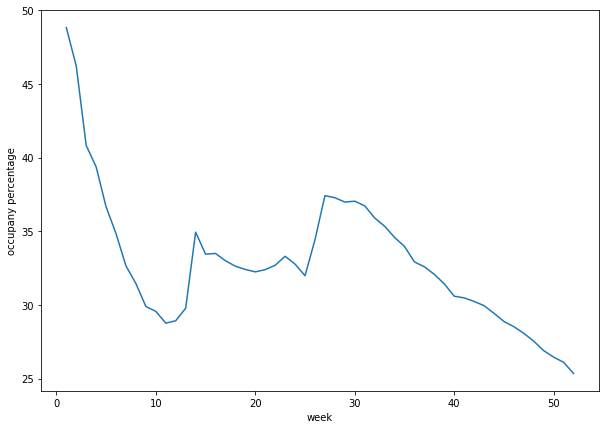

In [286]:
x = merged_counts_by_week['key_0']
y = merged_counts_by_week['percetage_occupancy']
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.xlabel('week')
plt.ylabel('occupany percentage')
plt.plot(x,y)

Lets also plot total number of listings in a week, to see if number of listings change based on time of the year

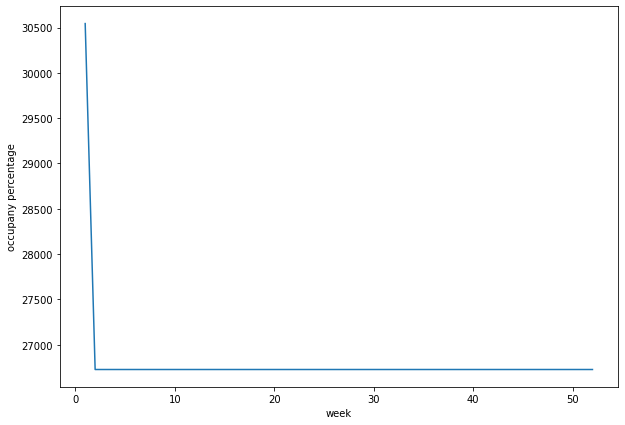

In [287]:
x = merged_counts_by_week['key_0']
y = merged_counts_by_week['total_listings']
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.xlabel('week')
plt.ylabel('occupany percentage')
plt.plot(x,y)

**Analysis**

* We can that the max occupany rate was around week 1, which is january first week
* the max occupany rate has been ~49%
* The last week of the year, had the least occupany rate.
* The occupany rate again picked up around week 27 which is around july 4, which is a holiday in the US.
* For new years the number of listings increased, as we had a much higher occupancy rate

**Price Impact by month, day of the week and holidays**

we will be again use the avialble airbnb dataframe

In [288]:
available_airbnb.head()

,listing_id,date,available,price,date_obj,month,week
0,241032,2016-01-04,t,$85.00,2016-01-04,1,1
1,241032,2016-01-05,t,$85.00,2016-01-05,1,1
9,241032,2016-01-13,t,$85.00,2016-01-13,1,2
10,241032,2016-01-14,t,$85.00,2016-01-14,1,2
14,241032,2016-01-18,t,$85.00,2016-01-18,1,3


In [289]:
available_airbnb['price'].isnull().values.any()

False

we will need to clean up the price column as it has non numberic value

In [290]:
def clean_price(df):
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
    return df

clean_price(available_airbnb)
available_airbnb.head()

/Users/nitinagarwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/nitinagarwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,listing_id,date,available,price,date_obj,month,week
0,241032,2016-01-04,t,85.0,2016-01-04,1,1
1,241032,2016-01-05,t,85.0,2016-01-05,1,1
9,241032,2016-01-13,t,85.0,2016-01-13,1,2
10,241032,2016-01-14,t,85.0,2016-01-14,1,2
14,241032,2016-01-18,t,85.0,2016-01-18,1,3


In [291]:
month_mean_price = available_airbnb.groupby(['month'])['price'].mean()

In [292]:
month_mean_price.head()

month
1    122.912176
2    124.293927
3    128.644488
4    135.097005
5    139.538183
Name: price, dtype: float64

lets visualise it

<AxesSubplot:title={'center':'Seattle Airbnb prices trend over months'}, xlabel='month'>

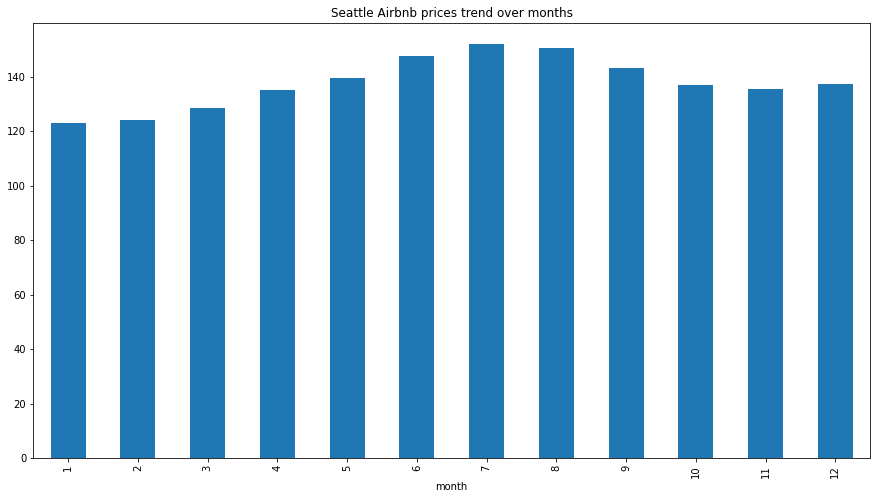

In [293]:
month_mean_price.plot(kind='bar', 
           x='month',
           y='mean_price', 
           figsize =(15,8), 
           title = 'Seattle Airbnb prices trend over months', 
           legend = False)

It can be clearly seen that the maximum average prices for listings were in the month of July, 2016 and August, 2016

lets analyse the price data based on day of the week

In [294]:
available_airbnb['day_of_week'] = available_airbnb['date_obj'].dt.day_name()
available_airbnb.head()

/Users/nitinagarwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,available,price,date_obj,month,week,day_of_week
0,241032,2016-01-04,t,85.0,2016-01-04,1,1,Monday
1,241032,2016-01-05,t,85.0,2016-01-05,1,1,Tuesday
9,241032,2016-01-13,t,85.0,2016-01-13,1,2,Wednesday
10,241032,2016-01-14,t,85.0,2016-01-14,1,2,Thursday
14,241032,2016-01-18,t,85.0,2016-01-18,1,3,Monday


In [295]:
airbnb_price_by_day_of_week = available_airbnb.groupby('day_of_week')['price'].mean().sort_values(ascending=False)
airbnb_price_by_day_of_week

day_of_week
Saturday     143.202136
Friday       143.036294
Thursday     136.476032
Sunday       136.459941
Monday       135.676414
Wednesday    135.447880
Tuesday      135.408764
Name: price, dtype: float64

It can be seen from this analysis that average price is much higher of friday/saturday(weekends) compared to weekdays

**which are the most popular neighbourhoods in seattle**

lets see the unique number of neighbourhoods in Seattle

In [296]:
listings['neighbourhood_cleansed'].nunique()

87

In [297]:
mean_pricing_by_listing = available_airbnb.groupby(['listing_id'])['price'].mean().to_frame()

merge mean pricing of a listing with listings dataframe

In [298]:
mean_pricing_by_listing = mean_pricing_by_listing.merge(listings, how='inner', left_on='listing_id', right_on='id')


In [299]:
mean_pricing_by_listing.head()

,price_x,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,120.000000,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,82.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,53.944984,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,92.849315,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,85.000000,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [300]:
airbnb_by_neighbourhood_count = mean_pricing_by_listing.groupby(['neighbourhood_cleansed'])['id'].count().to_frame()

In [301]:
airbnb_by_neighbourhood_count.sort_values(by='id')[:20]

,id
neighbourhood_cleansed,
Roxhill,2
South Park,3
South Beacon Hill,4
Pinehurst,4
Arbor Heights,5
Industrial District,6
Holly Park,6
View Ridge,7
Cedar Park,8


some neighourhoods have less than 20 listings, lets only process neighbourhoods with 20 or more neighbourhoods, as with less than 20 listings, it will be difficult to draw conclusions

In [302]:
airbnb_by_neighbourhood_count = airbnb_by_neighbourhood_count[airbnb_by_neighbourhood_count['id'] > 20]
neighbourds_to_process = list(airbnb_by_neighbourhood_count.index.values)
len(neighbourds_to_process)

45

In [303]:
mean_pricing_by_listing = mean_pricing_by_listing[mean_pricing_by_listing['neighbourhood_cleansed'].isin(neighbourds_to_process)]

mean_pricing_by_listing.head()

,price_x,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,82.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
3,92.849315,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,85.000000,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50
6,113.736842,9460,https://www.airbnb.com/rooms/9460,20160104002432,2016-01-04,Downtown Convention Ctr B&B - Nice!,"Great location, 98% walk score, next to the Co...",Greetings from Seattle! Thanks for considerin...,"Great location, 98% walk score, next to the Co...",none,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,2,3.11
7,169.500000,9531,https://www.airbnb.com/rooms/9531,20160104002432,2016-01-04,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,"The Sweet Orange invites you to stay and play,...",The Sweet Orange is a delightful and spacious ...,none,...,10.0,f,NaN,WASHINGTON,f,strict,f,t,2,0.54


lets plot the pricing data by neighbourhoods, to find more expensive neighbourhoods in Seattle area

<AxesSubplot:xlabel='neighbourhood_cleansed'>

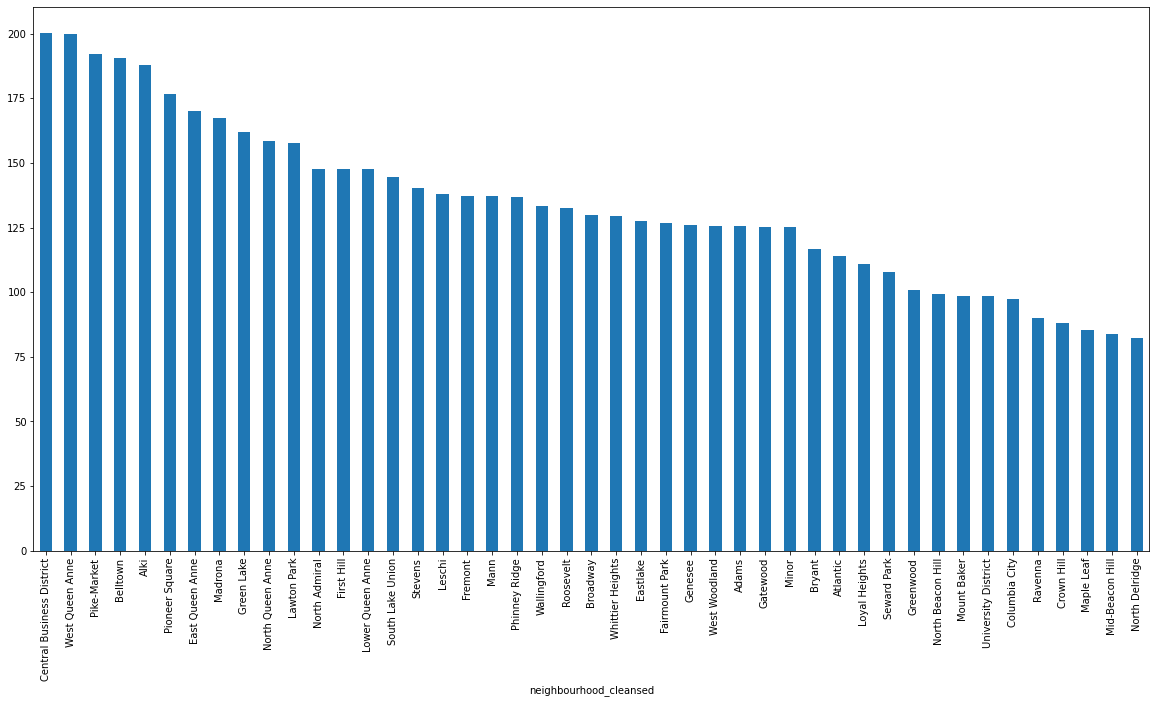

In [304]:
mean_pricing_by_neigbourhood = mean_pricing_by_listing.groupby(['neighbourhood_cleansed'])['price_x'].mean()
mean_pricing_by_neigbourhood.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))


lets also analyse the occupancy rate as per neighbourhoods, as we have the neighbourhoods which are more expensive than others, but it is not an 
indicator, if these are the most popular as well

In [305]:
available_airbnb_by_listing_id = available_airbnb.groupby(['listing_id']).count()
type(available_airbnb_by_listing_id)

pandas.core.frame.DataFrame

In [306]:
booked_airbnb_by_listing_id = booked_airbnb.groupby(['listing_id']).count()
booked_airbnb_by_listing_id.shape
type(booked_airbnb_by_listing_id)

# len(booked_airbnb_by_listing_id.index.values)


pandas.core.frame.DataFrame

In [307]:
merged_data = pd.merge(available_airbnb_by_listing_id['date'], booked_airbnb_by_listing_id['date'], how='outer', 
                       left_on=available_airbnb_by_listing_id.index.values,
                       right_on=booked_airbnb_by_listing_id.index.values)
                       
                       
merged_data.shape

(3818, 3)

In [308]:
merged_data.head()

,key_0,date_x,date_y
0,3335,309.0,56.0
1,4291,365.0,NaN
2,5682,309.0,56.0
3,6606,365.0,NaN
4,7369,53.0,312.0


we need to do a little clean up change column names and replace NaN with 0's

In [309]:
merged_data.columns = merged_data.columns.str.replace("key_0", "listing_id").str.replace("date_x", "empty").str.replace("date_y", "occupied")

In [310]:
merged_data['occupied'] = merged_data['occupied'].fillna(0)
merged_data['empty'] = merged_data['empty'].fillna(0)

In [311]:
merged_data.head()

,listing_id,empty,occupied
0,3335,309.0,56.0
1,4291,365.0,0.0
2,5682,309.0,56.0
3,6606,365.0,0.0
4,7369,53.0,312.0


In [312]:
merged_data['occupancy_rate'] = (merged_data['occupied']/(merged_data['empty'] + merged_data['occupied'])) * 100 
merged_data.head()

,listing_id,empty,occupied,occupancy_rate
0,3335,309.0,56.0,15.342466
1,4291,365.0,0.0,0.000000
2,5682,309.0,56.0,15.342466
3,6606,365.0,0.0,0.000000
4,7369,53.0,312.0,85.479452


now group by this occupancy data by neighbourhoods which have 20 or more listings and we can plot and find which neighbourhoods have maximum occupancy

In [313]:
merged_data['overall_mean_occupancy_rate'] = (sum(merged_data['occupied'])/ (sum(merged_data['occupied']) + sum(merged_data['empty']))) * 100

In [314]:
merged_data.head()

,listing_id,empty,occupied,occupancy_rate,overall_mean_occupancy_rate
0,3335,309.0,56.0,15.342466,32.938998
1,4291,365.0,0.0,0.000000,32.938998
2,5682,309.0,56.0,15.342466,32.938998
3,6606,365.0,0.0,0.000000,32.938998
4,7369,53.0,312.0,85.479452,32.938998


now lets merge this data with listings dataframe and finally plot this info on a graph to analyse

In [315]:
merge_data_with_listings = merged_data.merge(listings, how='inner', left_on='listing_id', right_on='id')
merge_data_with_listings.head()

,listing_id,empty,occupied,occupancy_rate,overall_mean_occupancy_rate,id,listing_url,scrape_id,last_scraped,name,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3335,309.0,56.0,15.342466,32.938998,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,4291,365.0,0.0,0.000000,32.938998,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,5682,309.0,56.0,15.342466,32.938998,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,6606,365.0,0.0,0.000000,32.938998,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,7369,53.0,312.0,85.479452,32.938998,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [316]:
merge_data_with_listings = merge_data_with_listings[merge_data_with_listings['neighbourhood_cleansed'].isin(neighbourds_to_process)]


In [317]:
merge_data_with_listings.head()

,listing_id,empty,occupied,occupancy_rate,overall_mean_occupancy_rate,id,listing_url,scrape_id,last_scraped,name,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,4291,365.0,0.0,0.000000,32.938998,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
3,6606,365.0,0.0,0.000000,32.938998,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,7369,53.0,312.0,85.479452,32.938998,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50
6,9460,57.0,308.0,84.383562,32.938998,9460,https://www.airbnb.com/rooms/9460,20160104002432,2016-01-04,Downtown Convention Ctr B&B - Nice!,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,2,3.11
7,9531,180.0,185.0,50.684932,32.938998,9531,https://www.airbnb.com/rooms/9531,20160104002432,2016-01-04,The Adorable Sweet Orange Craftsman,...,10.0,f,NaN,WASHINGTON,f,strict,f,t,2,0.54


In [318]:
mean_occupancy_by_neighbourhood = merge_data_with_listings.groupby('neighbourhood_cleansed')['occupancy_rate'].mean()


In [319]:
type(mean_occupancy_by_neighbourhood)

pandas.core.series.Series

<AxesSubplot:xlabel='neighbourhood_cleansed'>

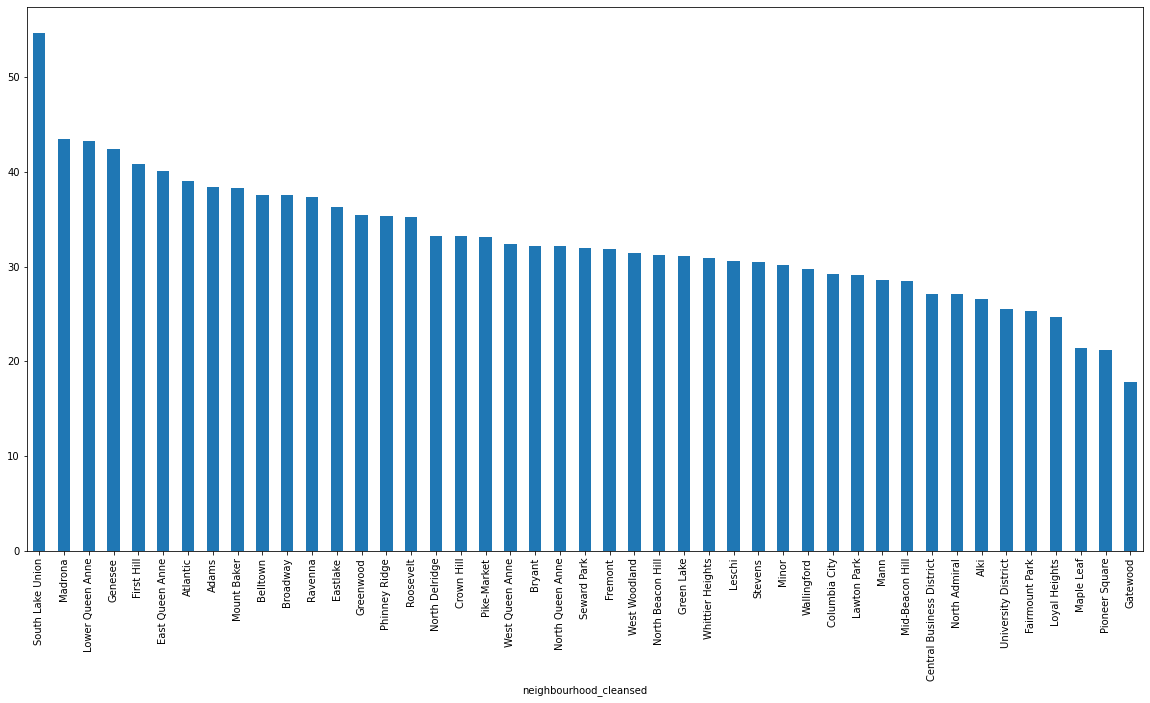

In [320]:
mean_occupancy_by_neighbourhood.sort_values(ascending=False).plot(kind='bar',  figsize=(20, 10))
                                                                                      

if we merge the occupany plot with price plot, it will give us a good insight, into popularity and does price have any relation with popularity


In [321]:
mean_occupancy_by_neighbourhood_df = mean_occupancy_by_neighbourhood.to_frame()
mean_pricing_by_neigbourhood_df = mean_pricing_by_neigbourhood.to_frame()



In [335]:
pricing_occupany_merged = mean_occupancy_by_neighbourhood_df.merge(mean_pricing_by_neigbourhood_df, 
                                                                on=mean_occupancy_by_neighbourhood_df.index.values, how='inner')

pricing_occupany_merged.shape

(45, 3)

<AxesSubplot:xlabel='key_0'>

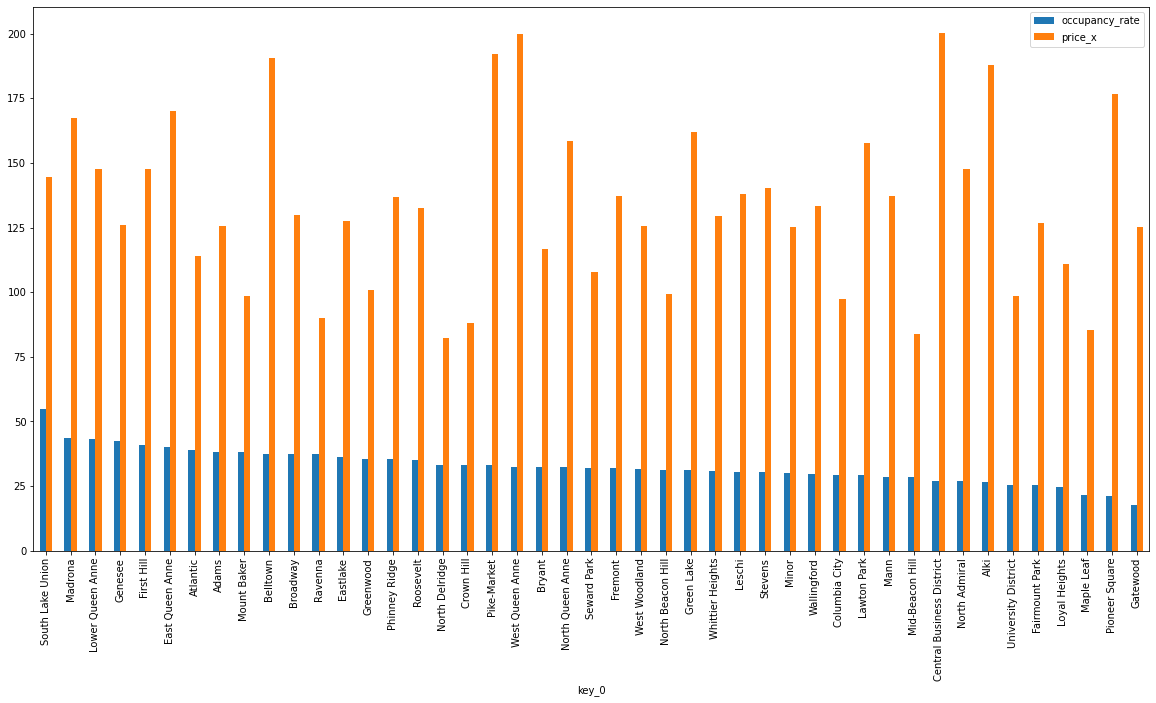

In [336]:
pricing_occupany_merged.sort_values(by='occupancy_rate', ascending=False).plot(kind='bar', 
                                                                               figsize=(20,10),
                                                                               x='key_0'
                                                                              )

In [348]:
list(mean_pricing_by_neigbourhood.sort_values(ascending=False)[:5].index.values)
mean_occupancy_by_neighbourhood_df.sort_values(by='occupancy_rate', ascending=False).head()

,occupancy_rate
neighbourhood_cleansed,
South Lake Union,54.672755
Madrona,43.485864
Lower Queen Anne,43.252696
Genesee,42.409347
First Hill,40.892948


**Analysis**

* We analysed that Central Business District, West Queen Anne, Pike-Market, Belltown, Alki are the 5 most expensive neigbourhoods.
* We found that below neigbhourhoods are most popular as per occupancy levels, South Lake Union	, Madrona, Lower Queen Anne, Genesee, First Hill
* the more expensive neighbourhood are not necessarily most occupied, the neighbourhood with most occupancy has close to mean price.
